<h1> <b> Lab - 9 </b> </h1>
<h3>Hierarchical Clustering on iris and diabetes dataset.</h3>
<br>

<br/><h2> <b> Import necessary modules.</b> </h2><br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

# Hierarchical Clustering on 'iris' dataset

<br/><h2> <b> Load the iris data.</b> </h2><br/>

In [2]:
iris = datasets.load_iris()
# iris.data
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<br/><h2> <b> Create a data frame of features.</b> </h2><br/>

In [3]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<br/><h2> <b> We need scaling of the data. For scaling the data 'whiten' method is used which scale the data using standard deviation and makes data near to 1.</b> </h2><br/>

In [4]:
# Import the whiten function
from scipy.cluster.vq import whiten

scaled_data = whiten(df.to_numpy())

In [5]:
pd.DataFrame(scaled_data).describe()

# we can see that std values are near to 1.

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,7.080243,7.037882,2.135951,1.578709
std,1.003350,1.003350,1.003350,1.003350
min,5.210218,4.603935,0.568374,0.131632
25%,6.179561,6.445509,0.909399,0.394897
50%,7.027736,6.905903,2.472428,1.711218
75%,7.754744,7.596493,2.898709,2.369379
max,9.572262,10.128658,3.921782,3.290805


<br/><h2> <b> Preparing a distance matrix using linkage.<br/>
Calculate the diatance between 2 clusters.</b> </h2><br/>

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage

distance_matrix = linkage(scaled_data, method = 'single', metric = 'euclidean')
# distance_matrix

<br/><h2> <b> Creating a dendrogram to knopw how clusters are composed.</b> </h2><br/>

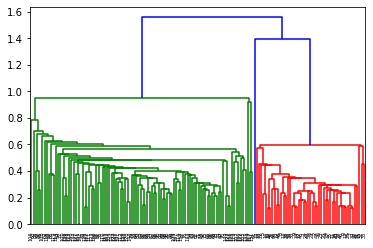

In [7]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

<br/><h2> <b> Here, it is clearly visible that 3 clusters are needed.
<br/> Performing the clustering.</b> </h2><br/>

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
hc_model.fit_predict(iris.data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<br/><h2> <b> Now, we can see that data is clusterd.</b> </h2><br/>

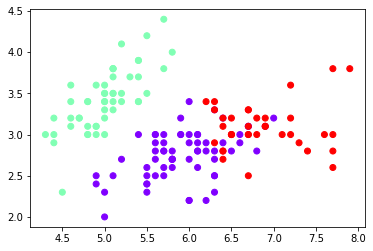

In [9]:
plt.scatter(x = iris.data[:,0], y = iris.data[:,1], c = hc_model.labels_, cmap='rainbow')

# Hierarchical Clustering on 'diabetes' dataset

<br/><h2> <b> Load the diabetes data.</b> </h2><br/>

In [10]:
diabetes = datasets.load_diabetes()

<br/><h2> <b> Extract features and targets from the data.</b> </h2><br/>

In [11]:
X = diabetes.data
Y = diabetes.target

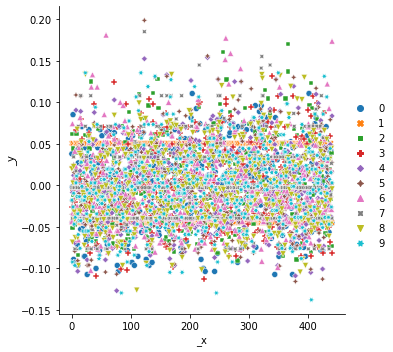

In [12]:
sns.relplot(data = X)

<br/><h2> <b> Creating a dataframe and checking that data is already scaled.</b> </h2><br/>

In [13]:
df1 = pd.DataFrame(X)
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


<br/><h2> <b> Preparing a distance matrix using linkage.<br/>
Calculate the diatance between 2 clusters.</b> </h2><br/>

In [14]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage

distance_matrix = linkage(X, method = 'single', metric = 'euclidean')
# distance_matrix

<br/><h2> <b> Creating a dendrogram to knopw how clusters are composed.</b> </h2><br/>

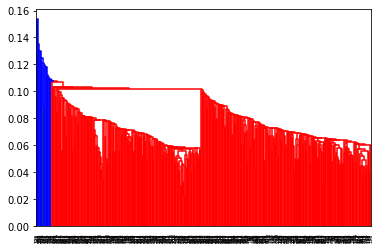

In [15]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

<br/><h2> <b> Here, it is clearly visible that 2 clusters are needed.
<br/> Performing the clustering.</b> </h2><br/>

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean',linkage = 'ward')
hc_model.fit_predict(X)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

<br/><h2> <b> Now, we can see that data is clusterd.</b> </h2><br/>

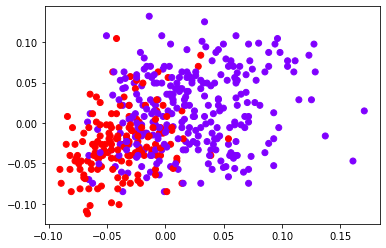

In [18]:
plt.scatter(x = X[:,2], y = X[:,3], c = hc_model.labels_, cmap='rainbow')